# CAP 5768 - Data Science - Dr. Marques - Fall 2019

## Assignment 3: Statistical analysis - Part 1

### Goals 

- To transition from data analytics to basic statistical analysis.
- To practice the computation and displaying of summary statistics, percentiles, PMFs and (E)CDFs.
- To expand upon the prior experience of manipulating, summarizing, and visualizing small datasets. 
- To display and interpret bee swarm plots and box-and-whisker plots.
- To visualize and compute pairwise correlations among variables in the dataset.


### Instructions

- This assignment is structured as a single block, using the same dataset throughout.
- As usual, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.

-------------------
## The Iris dataset

![pictures/Iris.png](pictures/Iris.png)

The Python code below will load a dataset containing information about three types of Iris flowers that had the size of its petals and sepals carefully measured.

The Fisher’s Iris dataset contains 150 observations with 4 features each: 
- sepal length in cm; 
- sepal width in cm; 
- petal length in cm; and 
- petal width in cm. 

The class for each instance is stored in a separate column called “species”. In this case, the first 50 instances belong to class Setosa, the following 50 belong to class Versicolor and the last 50 belong to class Virginica.

See:
https://archive.ics.uci.edu/ml/datasets/Iris for additional information.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame, Series

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Histogram and summary statistics 

The code below can be used to display the histogram of versicolor petal lengths (with meaningful labels for the axes and default option for number of bins). 

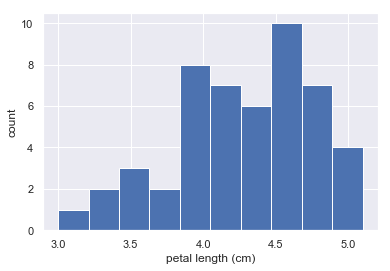

In [2]:
# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length
plt.hist(versicolor_petal_length)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()

### Write code to:

1. Modify the histogram above, this time using the "square root rule" for the number of bins. (4 pts)

*The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples.*

2. Modify the histogram above, such that the y axis shows probability/proportion (rather than absolute count), i.e., a proper PMF. (4 pts) 

3. Compute summary statistics (2 pts each): mean and standard deviation 

## Solution

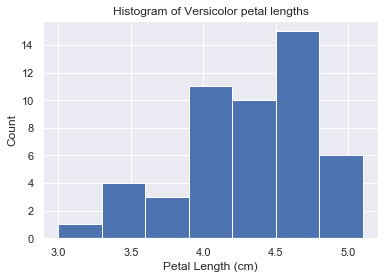

In [3]:
# 1. Modify the histogram above, this time using the "square root rule" for the number of bins.
# The "square root rule" is a commonly-used rule of thumb for choosing number of bins: 
# choose the number of bins to be the square root of the number of samples.

# Use square root rule for the bins size
samplesSizes = versicolor_petal_length.shape[0];
binsMax = np.sqrt(samplesSizes); 
bins = int(binsMax);

# Plot histogram and label axes
plt.hist(versicolor_petal_length, bins=bins);
plt.xlabel('Petal Length (cm)');
plt.ylabel('Count');
plt.title('Histogram of Versicolor petal lengths')

# Show histogram
plt.show()

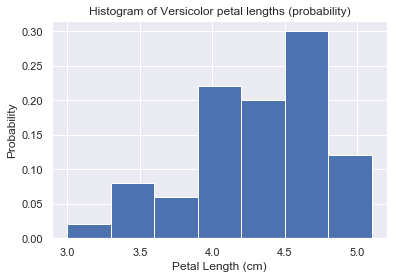

In [4]:
# 2. Modify the histogram above, such that the y axis shows probability/proportion 
# (rather than absolute count), i.e., a proper PMF. 

# Calculate for Probability
versicolorUnique, versicolorCounts = np.unique(versicolor_petal_length, return_counts=True);
PMF = versicolorCounts/versicolor_petal_length.shape[0];

# https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.hist.html
# Using the "weights" parameter for probability ("density" parameter = probability density)
plt.hist(versicolorUnique, bins=bins, weights=PMF);
plt.xlabel('Petal Length (cm)');
plt.ylabel('Probability');
plt.title('Histogram of Versicolor petal lengths (probability)')

# Show histogram
plt.show()

In [5]:
# 3. Compute summary statistics: mean and standard deviation

print("Summary Statistics:")
print("\tMean Length(cm):", np.round(np.mean(versicolor_petal_length),decimals=2))
print("\tStandard Deviation:", np.round(np.std(versicolor_petal_length),decimals=2))

Summary Statistics:
	Mean Length(cm): 4.26
	Standard Deviation: 0.47


### Make a bee swarm plot of the iris petal lengths. Your x-axis should contain each of the three species (properly labeld), and the y-axis the petal lengths. 

Your plot should look like this:

![pictures/iris_beeswarm.png](pictures/iris_beeswarm.png)

## Solution

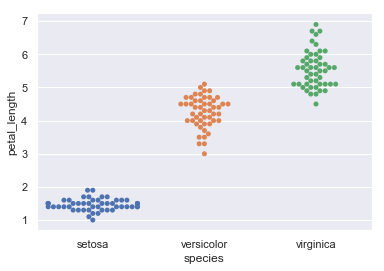

In [6]:
# Make a bee swarm plot of the iris petal lengths. Your x-axis should contain each 
# of the three species (properly labeled), and the y-axis the petal lengths.

# https://seaborn.pydata.org/generated/seaborn.swarmplot.html
ax = sns.swarmplot(x="species", y="petal_length",data=iris)

### Questions 1-2

1. Explain the "binning bias" associated with histogram plots.

2. What is a bee swarm plot and in which situations should you (not) use it?

## Solution

1. The "binning bias" associated with histogram plots is when even with the same data inputs, the visual representation of the histogram can be drastically change based on the number of bins. 
2. The bee swarm plot is a one dimensional plot that would make each point visible. It does give us as much information as the histogram but doesn't suffer from the binning bias. Therefore, we can use it instead of using the histogram. The situation that we should NOT use it is when we have a lot of data to plot since the plot will be too big to accommodate for making all the points visible. 

## Empirical Cumulative Distribution Function (ECDF)

The function below takes as input a 1D array of data and then returns the x and y values of the ECDF.

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

### Use the ``ecdf()`` function above to compute the ECDF for the petal lengths of the Iris versicolor flowers (6 pts) and plot the resulting ECDF (6 pts).

Your plot should look like this:

![pictures/ecdf_versicolorpng.png](pictures/ecdf_versicolorpng.png)

## Solution

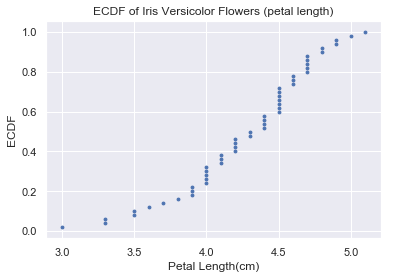

In [8]:
# Use the ecdf() function above to compute the ECDF for the petal lengths 
# of the Iris versicolor flowers (6 pts) and plot the resulting ECDF (6 pts).

# Calculate for the ECDF
x, y = ecdf(versicolor_petal_length);

# Plot the ECDF
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.title("ECDF of Iris Versicolor Flowers (petal length)")
plt.xlabel('Petal Length(cm)')
plt.ylabel('ECDF');
plt.scatter(x, y, s=8)
plt.show()

### Write code to plot ECDFs for the petal lengths of all three iris species.

Your plot should look like this:

![pictures/ECDFs_Iris.png](pictures/ECDFs_Iris.png)

## Solution

In [9]:
# Petal lengths of all three iris species
setosa_petal_length = iris[iris.species == 'setosa'].petal_length
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length
virginica_petal_length = iris[iris.species == 'virginica'].petal_length

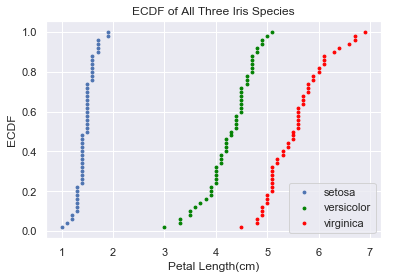

In [10]:
# Plot ECDFs for the petal lengths of all three iris species.

# Calculate for the ECDF of each species
setosaX, setosaY = ecdf(setosa_petal_length)
versicolorX, versicolorY = ecdf(versicolor_petal_length)
virginicaX, virginicaY = ecdf(virginica_petal_length)

# Plot all three Iris species
plt.title("ECDF of All Three Iris Species")
plt.xlabel('Petal Length(cm)')
plt.ylabel('ECDF');
plt.scatter(setosaX, setosaY, s=8, label="setosa")
plt.scatter(versicolorX, versicolorY, s=8, color="green", label="versicolor")
plt.scatter(virginicaX, virginicaY, s=8, color="red", label="virginica")
plt.legend()
plt.show()

## Percentiles

The code below computes the 25th, 50th, and 75th percentiles for the petal lengths of the Iris versicolor species and overlays the results on top of the ECDF.

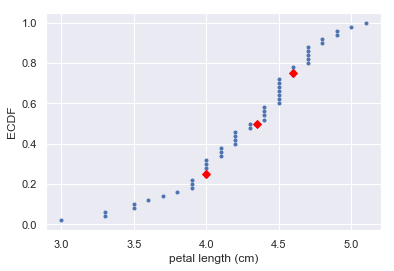

In [11]:
# Specify array of percentiles: percentiles
percentiles = np.array([25, 50, 75])

# Compute percentiles
ptiles_versicolor = np.percentile(versicolor_petal_length, percentiles)

# Compute ECDF
x_vers, y_vers = ecdf(versicolor_petal_length)
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_versicolor, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

### Write code to compute the 25th, 50th, and 75th percentiles for the petal lengths of and plot the resulting values overlaid with the corresponding ECDFs for all three iris species.

## Solution

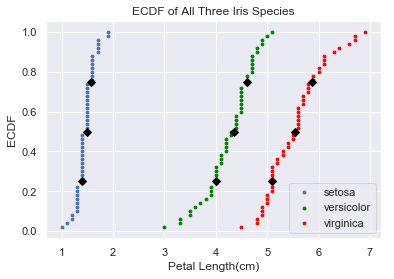

In [12]:
# Write code to compute the 25th, 50th, and 75th percentiles for the petal lengths of and 
# plot the resulting values overlaid with the corresponding ECDFs for all three iris species.

# Specify array of percentiles: percentiles
percentiles = np.array([25, 50, 75])

# Compute percentiles for each species
ptiles_setosa = np.percentile(setosa_petal_length, percentiles)
ptiles_versicolor = np.percentile(versicolor_petal_length, percentiles)
ptiles_virginica = np.percentile(virginica_petal_length, percentiles)

# Calculate for the ECDF of each species
setosaX, setosaY = ecdf(setosa_petal_length)
versicolorX, versicolorY = ecdf(versicolor_petal_length)
virginicaX, virginicaY = ecdf(virginica_petal_length)

# Plot the ECDF
irisPlot = plt.scatter(setosaX, setosaY, s=8, label="setosa")
irisPlot = plt.scatter(versicolorX, versicolorY, s=8, color="green", label="versicolor")
irisPlot = plt.scatter(virginicaX, virginicaY, s=8, color="red", label="virginica")

# Overlay percentiles as black diamonds.
irisPlot = plt.plot(ptiles_setosa, percentiles/100, marker='D', color='black',
         linestyle='none')
irisPlot = plt.plot(ptiles_versicolor, percentiles/100, marker='D', color='black',
         linestyle='none')
irisPlot = plt.plot(ptiles_virginica, percentiles/100, marker='D', color='black',
         linestyle='none')

# Show the plot
plt.title("ECDF of All Three Iris Species")
plt.xlabel('Petal Length(cm)')
plt.ylabel('ECDF')
plt.legend()
plt.show()

## Box-and-whisker plots

Box-and-whisker plots (or simply box plots) show the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. 
The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

![pictures/Box_plot.png](pictures/Box_plot.png)

### Write code to display the box-and-whisker plot for the petal lengths of all three iris species.

Your plot should look like this:

![pictures/Iris_boxplot.png](pictures/Iris_boxplot.png)

## Solution

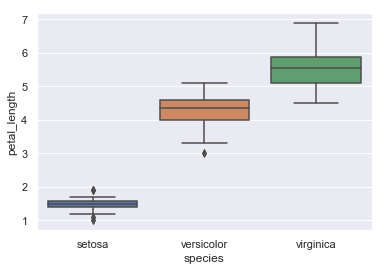

In [13]:
# Display the box-and-whisker plot for the petal lengths of all three iris species.

# https://seaborn.pydata.org/generated/seaborn.boxplot.html
ax = sns.boxplot(x="species", y="petal_length", data=iris);

###  Questions 3-4

3. Which species has the largest/smallest standard deviation?
4. Which species has the largest/smallest number of outliers?

## Solution

3. The species that has the largest standard deviation is Virginica since it has the largest IQR (which also lead to bigger number of 1.5 x IQR). The species that has the smallest standard deviation is Setosa since it has the smallest IQR (which also lead to smaller number of 1.5 x IQR). 
4. The species that has the largest number of outliers is Setosa. The species that has the smallest number of outliers is Virginica. 

### Write code to display the box-and-whisker plot combined with the bee swarm plot for the petal lengths of all three iris species.

## Solution

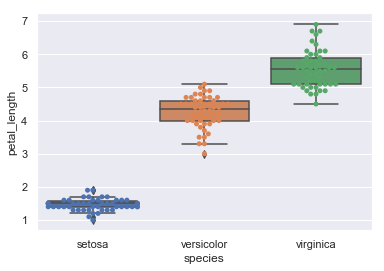

In [14]:
# Display the box-and-whisker plot combined with the bee swarm plot
# for the petal lengths of all three iris species.

ax = sns.swarmplot(x="species", y="petal_length",data=iris)
ax = sns.boxplot(x="species", y="petal_length", data=iris);

## Scatter plots, pair plots, and correlation between two variables

The code below:

1. Displays the pair plots for all (4) attributes for all (3) categories/species/classes in the Iris dataset.
2. Computes the covariance matrix for the versicolor species.
3. Computes the Pearson correlation coefficient between petal length and petal width for the versicolor species.


Pearson correlation coefficient between petal length and petal width for versicolor species: 0.78667


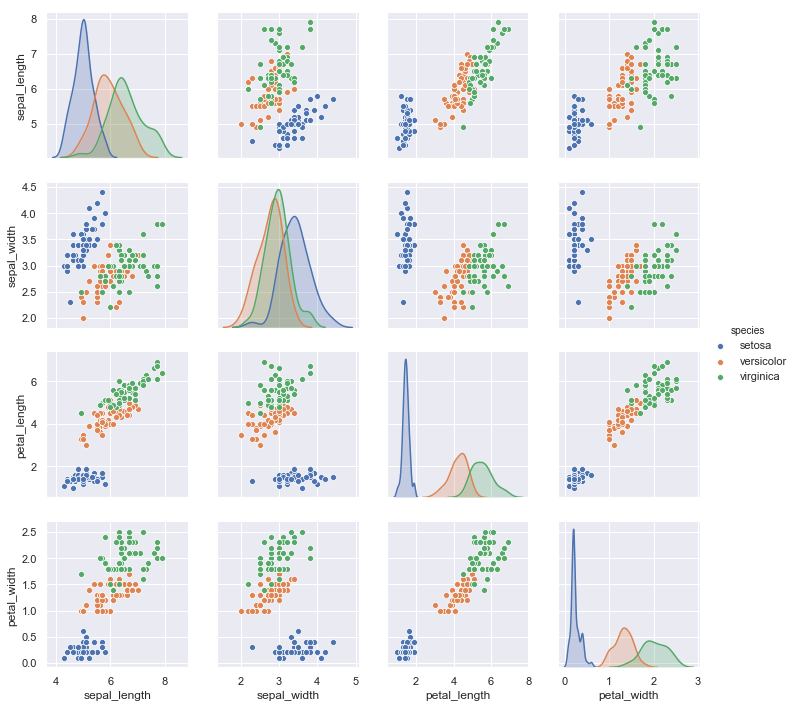

In [15]:
# Display pair plot
sns.pairplot(iris, hue='species', height=2.5);

# Compute 1D arrays for petal length and width
versicolor_petal_width = iris[iris.species == 'versicolor'].petal_width
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)
print('Pearson correlation coefficient between petal length and petal width for versicolor species: {:.5f}'.format(r))

### Extend the code above to compute the Pearson correlation coeficients for all pair-wise combinations of all three Iris species and display the results in a table format.

## Solution

In [16]:
# Extend the code above to compute the Pearson correlation coeficients for all pair-wise 
# combinations of all three Iris species and display the results in a table format.

                            # Using Python Libraries and Loop #
import itertools

attributeDictionary = dict({0:'sepal_length',
                            1:'sepal_width',
                            2:'petal_length',
                            3:'petal_width'})
print("attributeDictionary: ", attributeDictionary)

pairwise = list(itertools.combinations(attributeDictionary, 2))
print("pairwise: ", pairwise);

attributeDictionary:  {0: 'sepal_length', 1: 'sepal_width', 2: 'petal_length', 3: 'petal_width'}
pairwise:  [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


In [17]:
# Setosa #
# Compute 1D arrays for petal length and width
setosa_sepal_length = iris[iris.species == 'setosa'].sepal_length
setosa_sepal_width = iris[iris.species == 'setosa'].sepal_width
setosa_petal_length = iris[iris.species == 'setosa'].petal_length
setosa_petal_width = iris[iris.species == 'setosa'].petal_width

setosa = np.array([setosa_sepal_length,setosa_sepal_width,setosa_petal_length,setosa_petal_width])
setosa.shape

(4, 50)

In [18]:
# Compute Pearson correlation coefficient
setosaResult = list();

for x in range(0, 6):
    result = pearson_r(setosa[pairwise[x][0]], setosa[pairwise[x][1]])
    setosaResult.append(result)
    
print("Setosa:\n", setosaResult)

Setosa:
 [0.7425466856651597, 0.26717575886875716, 0.2780983529359696, 0.17769996678227068, 0.2327520113628792, 0.33163004080411845]


In [19]:
# Versicolor #
# Compute 1D arrays for petal length and width
versicolor_sepal_length = iris[iris.species == 'versicolor'].sepal_length
versicolor_sepal_width = iris[iris.species == 'versicolor'].sepal_width
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length
versicolor_petal_width = iris[iris.species == 'versicolor'].petal_width

versicolor = np.array([versicolor_sepal_length,versicolor_sepal_width,versicolor_petal_length,versicolor_petal_width])
versicolorResult = list();

# Compute Pearson correlation coefficient
for x in range(0, 6):
    result = pearson_r(versicolor[pairwise[x][0]], versicolor[pairwise[x][1]])
    versicolorResult.append(result)
    
print("Versicolor:\n",versicolorResult,"\n")

# Virginica #
# Compute 1D arrays for petal length and width
virginica_sepal_length = iris[iris.species == 'virginica'].sepal_length
virginica_sepal_width = iris[iris.species == 'virginica'].sepal_width
virginica_petal_length = iris[iris.species == 'virginica'].petal_length
virginica_petal_width = iris[iris.species == 'virginica'].petal_width

virginica = np.array([virginica_sepal_length,virginica_sepal_width,virginica_petal_length,virginica_petal_width])
virginicaResult = list();

# Compute Pearson correlation coefficient
for x in range(0, 6):
    result = pearson_r(virginica[pairwise[x][0]], virginica[pairwise[x][1]])
    virginicaResult.append(result)
    
print("Virginica:\n",virginicaResult)

Versicolor:
 [0.5259107172828243, 0.754048958592016, 0.5464610715986299, 0.560522091692982, 0.6639987200241115, 0.7866680885228169] 

Virginica:
 [0.4572278163941129, 0.8642247329355764, 0.28110770915731925, 0.4010445773427854, 0.5377280262661887, 0.3221082159003183]


In [20]:
                            # Manually call the function with inputs # 

# Setosa #
# Compute 1D arrays for petal length and width
setosa_sepal_length = iris[iris.species == 'setosa'].sepal_length
setosa_sepal_width = iris[iris.species == 'setosa'].sepal_width
setosa_petal_length = iris[iris.species == 'setosa'].petal_length
setosa_petal_width = iris[iris.species == 'setosa'].petal_width

# Compute Pearson correlation coefficient
setosa_sepal_length_sepal_width = pearson_r(setosa_sepal_length, setosa_sepal_width)
setosa_sepal_length_petal_length = pearson_r(setosa_sepal_length, setosa_petal_length)
setosa_sepal_length_petal_width = pearson_r(setosa_sepal_length, setosa_petal_width)
setosa_sepal_width_petal_length = pearson_r(setosa_sepal_width, setosa_petal_length)
setosa_sepal_width_petal_width = pearson_r(setosa_sepal_width, setosa_petal_width)
setosa_petal_length_petal_width = pearson_r(setosa_petal_length, setosa_petal_width)

print("setosa: ", setosa_sepal_length_sepal_width, ", ", setosa_sepal_length_petal_length,
     ",", setosa_sepal_length_petal_width, ",\n",setosa_sepal_width_petal_length,
     ",", setosa_sepal_width_petal_width, ",",setosa_petal_length_petal_width, "\n")

# Versicolor #
# Compute 1D arrays for petal length and width
versicolor_sepal_length = iris[iris.species == 'versicolor'].sepal_length
versicolor_sepal_width = iris[iris.species == 'versicolor'].sepal_width
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length
versicolor_petal_width = iris[iris.species == 'versicolor'].petal_width

# Compute Pearson correlation coefficient
versicolor_sepal_length_sepal_width = pearson_r(versicolor_sepal_length, versicolor_sepal_width)
versicolor_sepal_length_petal_length = pearson_r(versicolor_sepal_length, versicolor_petal_length)
versicolor_sepal_length_petal_width = pearson_r(versicolor_sepal_length, versicolor_petal_width)
versicolor_sepal_width_petal_length = pearson_r(versicolor_sepal_width, versicolor_petal_length)
versicolor_sepal_width_petal_width = pearson_r(versicolor_sepal_width, versicolor_petal_width)
versicolor_petal_length_petal_width = pearson_r(versicolor_petal_length, versicolor_petal_width)

print("versicolor: ", versicolor_sepal_length_sepal_width, ", ", versicolor_sepal_length_petal_length,
     ",", versicolor_sepal_length_petal_width, ",\n", versicolor_sepal_width_petal_length,
     ",", versicolor_sepal_width_petal_width, ",", versicolor_petal_length_petal_width, "\n")


# Virginica #
# Compute 1D arrays for petal length and width
virginica_sepal_length = iris[iris.species == 'virginica'].sepal_length
virginica_sepal_width = iris[iris.species == 'virginica'].sepal_width
virginica_petal_length = iris[iris.species == 'virginica'].petal_length
virginica_petal_width = iris[iris.species == 'virginica'].petal_width

# Compute Pearson correlation coefficient
virginica_sepal_length_sepal_width = pearson_r(virginica_sepal_length, virginica_sepal_width)
virginica_sepal_length_petal_length = pearson_r(virginica_sepal_length, virginica_petal_length)
virginica_sepal_length_petal_width = pearson_r(virginica_sepal_length, virginica_petal_width )
virginica_sepal_width_petal_length = pearson_r(virginica_sepal_width, virginica_petal_length)
virginica_sepal_width_petal_width = pearson_r(virginica_sepal_width, virginica_petal_width)
virginica_petal_length_petal_width = pearson_r(virginica_petal_length, virginica_petal_width)

print("virginica: ", virginica_sepal_length_sepal_width, ", ", virginica_sepal_length_petal_length,
     ",", virginica_sepal_length_petal_width, ",\n", virginica_sepal_width_petal_length,
     ",", virginica_sepal_width_petal_width, ",", virginica_petal_length_petal_width, "\n")

setosa:  0.7425466856651597 ,  0.26717575886875716 , 0.2780983529359696 ,
 0.17769996678227068 , 0.2327520113628792 , 0.33163004080411845 

versicolor:  0.5259107172828243 ,  0.754048958592016 , 0.5464610715986299 ,
 0.560522091692982 , 0.6639987200241115 , 0.7866680885228169 

virginica:  0.4572278163941129 ,  0.8642247329355764 , 0.28110770915731925 ,
 0.4010445773427854 , 0.5377280262661887 , 0.3221082159003183 



In [21]:
# Display the results in a table format

print("attributeDictionary: ", attributeDictionary)
print("pairwise: ", pairwise);

attributeDictionary:  {0: 'sepal_length', 1: 'sepal_width', 2: 'petal_length', 3: 'petal_width'}
pairwise:  [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


In [22]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html

# Create the table using pandas Dataframe
header = pd.MultiIndex.from_product([["Setosa","Versicolor","Virginica"], [0,1,2]],
                                    names=['Names','Attributes'])
df_iris = pd.DataFrame(index=[1,2,3], columns=header)
df_iris

Names      Setosa           Versicolor           Virginica          
Attributes      0    1    2          0    1    2         0    1    2
1             NaN  NaN  NaN        NaN  NaN  NaN       NaN  NaN  NaN
2             NaN  NaN  NaN        NaN  NaN  NaN       NaN  NaN  NaN
3             NaN  NaN  NaN        NaN  NaN  NaN       NaN  NaN  NaN

In [23]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html

# Load data into the table using a 'for' loop
for x in range(0, 6):
    df_iris.loc[[pairwise[x][1]],("Setosa", [pairwise[x][0]])] = setosaResult[x]
    df_iris.loc[[pairwise[x][1]],("Versicolor", [pairwise[x][0]])] = versicolorResult[x]
    df_iris.loc[[pairwise[x][1]],("Virginica", [pairwise[x][0]])] = virginicaResult[x]
    
        ### Not a preferred method for indexing in MultiIndex ###
    # df["Setosa"][pairwise[x][0]][pairwise[x][1]] = setosaResult[x]
    # df["Versicolor"][pairwise[x][0]][pairwise[x][1]] = versicolorResult[x]
    # df["Virginica"][pairwise[x][0]][pairwise[x][1]] = virginicaResult[x]
    # Need to stop the warning: pd.options.mode.chained_assignment = None
    
df_iris

Names         Setosa                    Versicolor                      \
Attributes         0         1        2          0         1         2   
1           0.742547       NaN      NaN   0.525911       NaN       NaN   
2           0.267176    0.1777      NaN   0.754049  0.560522       NaN   
3           0.278098  0.232752  0.33163   0.546461  0.663999  0.786668   

Names      Virginica                      
Attributes         0         1         2  
1           0.457228       NaN       NaN  
2           0.864225  0.401045       NaN  
3           0.281108  0.537728  0.322108

In [24]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

# Rename the columns and rows
df_iris = df_iris.rename(columns={0: attributeDictionary[0], 1: attributeDictionary[1], 
                               2:attributeDictionary[2]}, level = 1);
df_iris = df_iris.rename(index={1: attributeDictionary[1], 2:attributeDictionary[2],
                                3: attributeDictionary[3]});
df_iris

Names              Setosa                            Versicolor              \
Attributes   sepal_length sepal_width petal_length sepal_length sepal_width   
sepal_width      0.742547         NaN          NaN     0.525911         NaN   
petal_length     0.267176      0.1777          NaN     0.754049    0.560522   
petal_width      0.278098    0.232752      0.33163     0.546461    0.663999   

Names                        Virginica                           
Attributes   petal_length sepal_length sepal_width petal_length  
sepal_width           NaN     0.457228         NaN          NaN  
petal_length          NaN     0.864225    0.401045          NaN  
petal_width      0.786668     0.281108    0.537728     0.322108

### Question 5 

5. Should the Pearson correlation coefficient be replaced with the Spearman rank-order correlation coefficient in this case? Why (not)?

In [25]:
# Method from textbook page 87

def SpearmanCorr(xs,ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return xs.corr(ys, method='spearman')

vers = SpearmanCorr(versicolor_sepal_width, versicolor_sepal_length)
print('Spearman correlation coefficient between sepal_width',
      'and sepal_length for versicolor species: {:.5f}'.format(vers))

virg = SpearmanCorr(virginica_sepal_width, virginica_sepal_length)
print('Spearman correlation coefficient between sepal_width',
      'and sepal_length for virginica species: {:.5f}'.format(virg))

Spearman correlation coefficient between sepal_width and sepal_length for versicolor species: 0.51761
Spearman correlation coefficient between sepal_width and sepal_length for virginica species: 0.42652


## Solution

Even though the Spearman rank-order correlation coefficient is more robuts and less sensitive when the data have strong outliers, I think we should use the Pearson correlation coefficient in this case since we do not have that many strong outliers in our iris dataset. I did an experiment using the method from our textbook to see how both of them responds to outliers (the strongest I can find by looking at the pairplot) in the data. The result of the experiment: 
1. Versicolor species (sepal_width, sepal_length): Spearman gave 0.51761 while Pearson gave 0.525911
2. Virginica species (sepal_width, sepal_length): Spearman gave 0.42652 while Pearson gave 0.457228

In dataset that has present of outliers, I would expect that the Spearman would give higher coeffient by looking at the plot since we can see the positive correlation (upward trend of the data points); however, that is not true in this case, it actually gave a lower value. As the result, the Pearson correlation coefficient is more useful to us in this case. 